### Loading liberary and dataset

In [25]:
library(ISLR2)
library(MASS)
library(class) 

### Dataset info

In [3]:
names(Smarket)
dim(Smarket)

# Attach the dataset
attach(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

[1] 1250    9

### Log linear regression

In [4]:
logistic.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(logistic.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


### Predictions base on glm

In [5]:
logistic.probs=predict(logistic.fit, type="response")
logistic.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

#### check dummy variable

In [6]:
contrasts(Direction)

,Up
Down,0
Up,1


### Convert the prob to class

In [7]:
# Create all "down" array
logistic.pred=rep("Down", 1250)

# Set threshold 0.5
logistic.pred[logistic.probs>0.5]="Up" 

### Cross Validation

#### Step 1: Split data (2001~2004 for training, 2005 for test)

In [8]:
train=(Year<2005)
Smarket.2005=Smarket[!train,] 
Direction.2005=Direction[!train]

#### Step 2: Train model on training data

In [9]:
logistic.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)

#### tep 3: Make Prediction on test data

In [10]:
logistic.probs=predict(logistic.fit, Smarket.2005, type="response")
logistic.pred=rep("Down", 252)

# Length(Direction.2005)
logistic.pred[logistic.probs>0.5]="Up"

#### Step 4: Assess prediction accuracy 

In [11]:
table(logistic.pred, Direction.2005) 
mean(logistic.pred==Direction.2005)

             Direction.2005
logistic.pred Down Up
         Down   77 97
         Up     34 44

[1] 0.4801587

### LDA and QDA

### Step 1 - Obtain dataset and Split it

### Step 2 - Train model and predict

In [18]:
lda.fit=lda(Direction~Lag1+Lag2, data=Smarket, subset=train) 
lda.pred = predict(lda.fit, Smarket.2005) 
names(lda.pred) 

# See what prediction contains 
# lda.pred$class 
# lda.pred$posterior

[1] "class"     "posterior" "x"

### Step 3 - Calculate prediction accuracy

In [19]:
lda.class = lda.pred$class 
table(lda.class, Direction.2005) 
mean(lda.class==Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

### Step 4 - Change threshold (Extra)

In [20]:
lda.class = rep("Down", length(Direction.2005))
lda.class[lda.pred$posterior[,2]>0.49] = "Up"
table(lda.class, Direction.2005) 
mean(lda.class==Direction.2005)

         Direction.2005
lda.class Down  Up
     Down    5   5
     Up    106 136

[1] 0.5595238

### ROC curve of Logistic Regression

        Predicted
Observed   0   1
    Down 114 488
    Up    97 551


FPR       TPR 
0.8106312 0.8503086

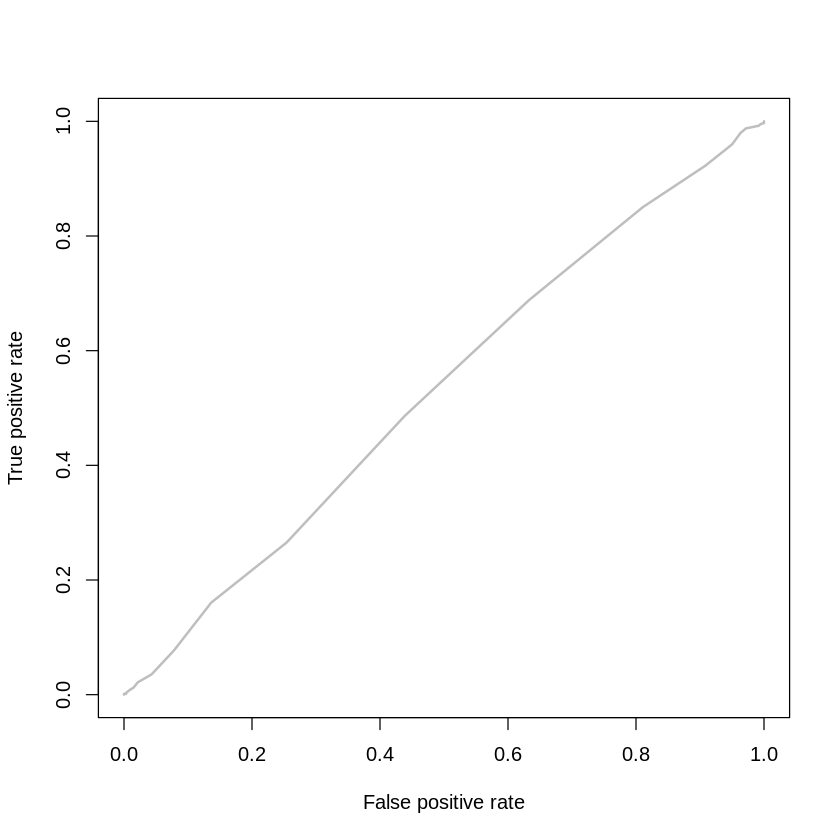

In [23]:
# fit logistic regression to all data (2001~2005) 
LR.fit = glm(Direction~Lag1+Lag2+Lag3, family=binomial, data=Smarket) 
# predict probability of "UP" 
LR.pred = predict(LR.fit, type="response")

# Calculate FPR and TPR under a given threshold
roc.curve=function(s, print=FALSE){ 
    Ps=(LR.pred>s)*1 
    FP=sum((Ps==1)*(Direction=="Down"))/sum(Direction=="Down")
    TP=sum((Ps==1)*(Direction=="Up"))/sum(Direction=="Up") 
    if(print==TRUE){ 
        print(table(Observed=Direction, Predicted=Ps))
    } 
    vect=c(FP, TP) 
    names(vect)=c("FPR", "TPR") 
    return(vect) 
} 

threshold=0.5 
roc.curve(threshold,print=TRUE) 

# Plot ROC curve 
ROC.curve=Vectorize(roc.curve) 
M.ROC=ROC.curve(seq(0,1,by=0.01))
plot(M.ROC[1,], M.ROC[2,], col="grey", lwd=2,type="l", xlab="False positive rate", ylab="True positive rate")

### ROC curve of LDA

        Predicted
Observed   0   1
    Down 111 491
    Up    97 551


FPR       TPR 
0.8156146 0.8503086

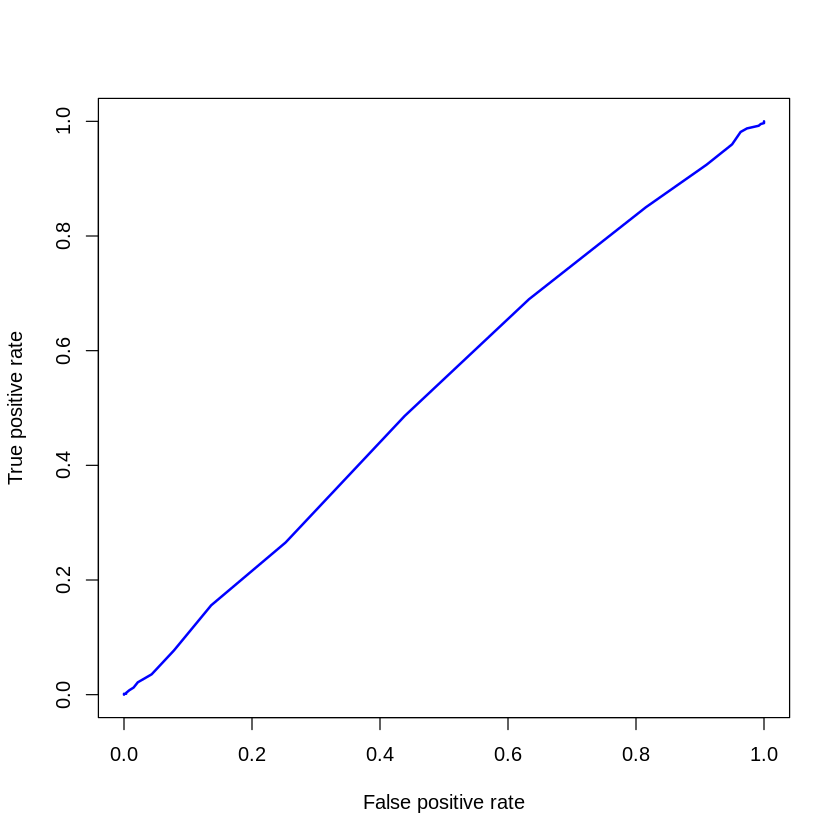

In [24]:
LDA.fit = lda(Direction~Lag1+Lag2+Lag3, data=Smarket) 
# Predict probabilities of training data 
LDA.pred0 = predict(LDA.fit,type="response") 
LDA.pred = LDA.pred0$posterior[,2]

# Calculate FPR and TPR under a given threshold
roc.curve=function(s, print=FALSE){ 
    Ps=(LDA.pred>s)*1 
    FP=sum((Ps==1)*(Direction=="Down"))/sum(Direction=="Down")
    TP=sum((Ps==1)*(Direction=="Up"))/sum(Direction=="Up") 
    if(print==TRUE){ 
        print(table(Observed=Direction, Predicted=Ps)) 
    } 
    vect=c(FP, TP) 
    names(vect)=c("FPR", "TPR") 
    return(vect) 
} 

threshold=0.5 
roc.curve(threshold,print=TRUE) 

# Plot ROC Curve 
ROC.curve=Vectorize(roc.curve) 
M.ROC=ROC.curve(seq(0,1,by=0.01))
plot(M.ROC[1,], M.ROC[2,], col="blue", lwd=2,type="l", xlab="False positive rate", ylab="True positive rate")

### KNN

In [27]:
train=(Year<2005) 

# Training data of observation
train.X=cbind(Lag1, Lag2)[train,]

# Test data of observation 
test.X=cbind(Lag1, Lag2)[!train,]

# Training data of response
train.Direction=Direction[train]

# Predict accuracy 
knn.pred1=knn(train.X, test.X, train.Direction, k=1) 
table(knn.pred1, Direction.2005) 
mean(knn.pred1==Direction.2005) 

# Change k to 3
knn.pred2=knn(train.X, test.X, train.Direction, k=3) 
table(knn.pred2, Direction.2005) 
mean(knn.pred2==Direction.2005)

# Change k to 5
knn.pred2=knn(train.X, test.X, train.Direction, k=5) 
table(knn.pred2, Direction.2005) 
mean(knn.pred2==Direction.2005)

         Direction.2005
knn.pred1 Down Up
     Down   43 58
     Up     68 83

[1] 0.5

         Direction.2005
knn.pred2 Down Up
     Down   48 56
     Up     63 85

[1] 0.5277778

         Direction.2005
knn.pred2 Down Up
     Down   40 59
     Up     71 82

[1] 0.484127